In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from keras.models import Sequential, Model
from keras.layers import LSTM,RepeatVector
from utility import get_sample_df, train_autoencoder_based_models

Using TensorFlow backend.


In [2]:
df = get_sample_df()

In [1]:
window_size = 10
model = Sequential()
model.add(LSTM(2, input_shape=(10, 1)))
model.add(RepeatVector(10))
model.add(LSTM(1, return_sequences=True))
print(model.summary())
model.compile(loss='mse', optimizer='adam')

NameError: name 'Sequential' is not defined

In [ ]:
nb_epoch = 20
df = train_autoencoder_based_models(df,window_size,nb_epoch)

In [4]:
error_prediction = []
for i in np.arange(11,len(df)):
    L = 10 #window size
    X_input = df["value"].values[i-(1+L):i-1].reshape((1,10,1))
    history = model.fit(X_input,X_input , nb_epoch=20, verbose=0)
    error_prediction.append((model.predict(X_input)-X_input)[0][0])
    print(i)
temp_no_error = [0]*11
error_prediction = temp_no_error + error_prediction
df['anomaly_score'] = error_prediction

/opt/conda/lib/python3.6/site-packages/keras/models.py:981: UserWarning:

The `nb_epoch` argument in `fit` has been renamed `epochs`.



11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27


KeyboardInterrupt: 

In [ ]:
error_prediction = []
for i in np.arange(11,len(df)):
    L = 10 #window size
    X_input = df["value"].values[i-(1+L):i-1].reshape((1,10,1))
    history = model.fit(X_input,X_input , nb_epoch=20, verbose=0)
    error_prediction.append((model.predict(X_input)-X_input)[0][0])
    print(i)
temp_no_error = [0]*11
error_prediction = temp_no_error + error_prediction
df['anomaly_score'] = error_prediction

,timestamp,value,anomaly_score
0,2014-07-01 00:00:00,10844,0
1,2014-07-01 00:30:00,8127,0
2,2014-07-01 01:00:00,6210,0
3,2014-07-01 01:30:00,4656,0
4,2014-07-01 02:00:00,3820,0


In [24]:
df['anomaly_score'].loc[0:1548] = sum(df.anomaly_score)/len(df)

/opt/conda/lib/python3.6/site-packages/pandas/core/indexing.py:189: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



ValueError: cannot set using a slice indexer with a different length than the value

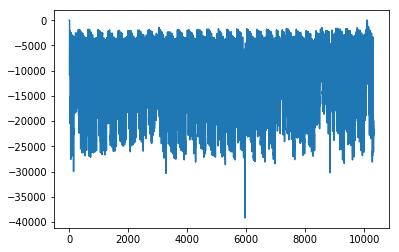

In [25]:
plt.plot(df.anomaly_score)

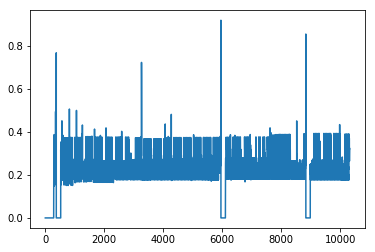

In [27]:
contextOSE_df = pd.read_csv("results/contextOSE/realKnownCause/contextOSE_nyc_taxi.csv")
plt.plot(contextOSE_df.anomaly_score)